In [1]:
import numpy as np
import torch 
import pickle
import os
import matplotlib.pyplot as plt
import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.utils.utils_load as load
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data as data
from pathlib import Path

### Useful paths

In [2]:
path = !pwd
path = Path(path[0])
path_utils = path/'../utils'
path_figures = path/'figures'
path_configs = path/'configs_parameter_search'
path_optimize_parameters = path_utils/'optimize_parameters.py'
path_logs = path/'.logs'
path_root = path/'../../'

### Useful functions

In [3]:
def plot(a,b,n_plot=10000,save_path = path_figures,ds = None,clf = None,fig_file = None,ymin = -0.1,ymax = 0.8):
    xtest = torch.linspace(a,b,n_plot)
    ytest = clf.predict(xtest)
    ydata_set =clf.predict(ds.X)
    ytestref = ds.apply_density(xtest)

    fig = plt.figure()
    plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
    plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
    plt.scatter(ds.X,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
    plt.legend()
    plt.xlabel("x",fontsize = 20)
    plt.ylabel("p(x)",fontsize = 20)
    
    plt.ylim(ymin = ymin,ymax = ymax)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    if isinstance(fig_file,str):
        fig.savefig(open(os.path.join(save_path,fig_file),'wb') , format='pdf', dpi=1000)
    plt.show()

def score(clf,ds,n = 1000):
    x_test = ds.sample_from_density(n)
    return clf.score(x_test)

# Our method

In [4]:
name = '1d_our_method'

In [5]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [ ]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [6]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [7]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:13:58,702  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:13:58,752  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:13:58,753  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


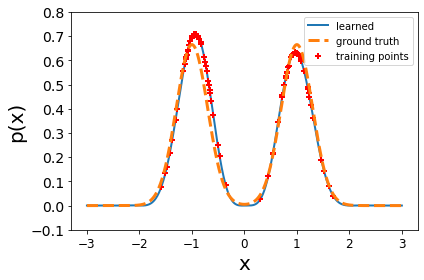

In [12]:
plot(-3,3,fig_file = fig_file,clf = clf,ds = ds)

## Performance

In [13]:
score(clf,ds,n=100000)

tensor(-0.9125)

# Linear method

In [14]:
name = '1d_linear_method'

In [15]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [16]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [17]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [18]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:14:20,883  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:14:20,914  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:14:20,915  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


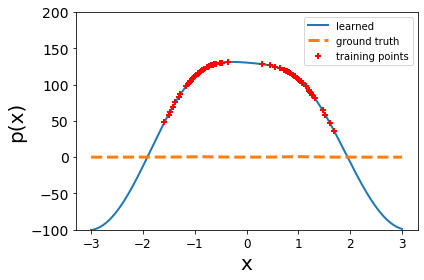

In [19]:
plot(-3,3,fig_file = fig_file,clf = clf,ds = ds,ymin = -100,ymax = 200)

## Performance

In [20]:
score(clf,ds,n=100000)

2020-11-24 14:14:21,929  root WARNING prediction contains negative probabilities; score set to np.nan


nan

# NCM method

In [21]:
name = '1d_nw_method'

In [22]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [23]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [24]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [25]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:15:31,660  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:15:31,710  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:15:31,711  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


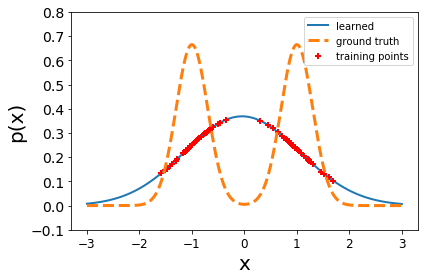

In [26]:
plot(-3,3,fig_file = fig_file,clf = clf,ds = ds)

## Performance

In [27]:
score(clf,ds,n=100000)

tensor(-1.4581)

# GLM method

In [28]:
name = '1d_glm_method'

In [29]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [30]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [31]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [32]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:16:00,044  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:16:00,101  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:16:00,102  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


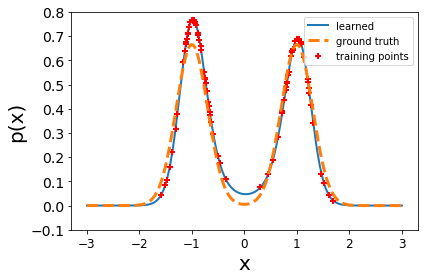

In [33]:
plot(-3,3,fig_file = fig_file,clf = clf,ds = ds)

## Performance

In [34]:
score(clf,ds,n=100000)

tensor(-0.9350)